In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
#from __future__ import division
import os, sys
import numpy as np
import pandas as pd
from keras.layers import Input, Dense, Flatten,Activation
from keras.layers import Conv1D, MaxPooling1D,Dropout,LSTM,GRU, RNN,SimpleRNN, Flatten
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from numpy import zeros
from numpy import asarray
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
data_1=pd.read_pickle('cleaned_df_final.pkl')
data_2=pd.read_csv('textResponses_graded.csv')

In [3]:
import pandas as pd

In [4]:
#data_2=data_2.iloc[:1450]
data_2=data_2[['Transaction Id','correctness','answerType']]

In [5]:
data=pd.merge(data_1,data_2,on='Transaction Id')

In [6]:
data.tail(2)

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),word_list,num_list,symb_list,correctness,answerType
7005,1030198,e10dce32b913fc822b5df17cb513e16f,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,Sc03f3121c394179d88011f7f77ce420a,5/20/16 8:58,47.5,NaN,Show what you learned A,Assessment_A,5,...,NaN,NaN,236.0,2016-05-20 12:58:53.910 UTC,2016-05-20 12:58:53.911 UTC,"[it, cannot, be, 6/13, FRACTION, because, of, ...","[6, 13]",[/],1,v
7006,1030200,53406cfa5946f9f896abedeb214aaa55,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,Sc03f3121c394179d88011f7f77ce420a,5/20/16 8:59,26.5,NaN,Show what you learned A,Assessment_A,6,...,NaN,NaN,236.0,2016-05-20 12:59:54.615 UTC,2016-05-20 12:59:54.633 UTC,"[32/65, FRACTION, be, smaller, because, it, be...","[32, 65]",[/],1,p


In [7]:
for i in range(len(data)):
    if data.answerType[i]=='c ':
        data.answerType[i]='c'

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [9]:
all_words=[]
for i in range(len(data)):
    temp_word_list=data.word_list[i]
    for temp_word in temp_word_list:
        if not (temp_word in all_words):
            all_words.append(temp_word)
               

In [10]:
select_rows=[]
for i in range(len(data)):
    if data.answerType[i] in ['p','c','n','u','v']:
        select_rows.append(i)
data=data.iloc[select_rows]

In [11]:
data['answer']=''
for i in range(len(data)):
    temp_word_list=data.word_list.iloc[i]
    temp_answer=''
    for temp_word in temp_word_list:
        temp_answer=temp_answer+temp_word+' '
    temp_answer=temp_answer[:-1]
    data['answer'].iloc[i]=temp_answer

D:\anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [129]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['answerType'] = labelencoder.fit_transform(data['answerType'])

In [130]:
data['answerType'].unique()

array([2, 1, 0, 3, 4], dtype=int64)

In [131]:
docs = []
labels =[]
docs_Test =[]
for row in data['answer']:
    docs.append(row)
for row_1 in data['answerType']:
    labels.append(row_1)

In [132]:
print(docs[0:5])
print(labels[0:5])

["no because you don't change the denominator so the why the answer be wrong", 'i do not know the answer', 'i do not know', "i don't know", 'i think she be right because i double check her answer']
[2, 1, 1, 1, 1]


In [133]:
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
print (vocab_size)


402


In [134]:
encoded_docs = t.texts_to_sequences(docs)

Text(0, 0.5, 'length of answer')

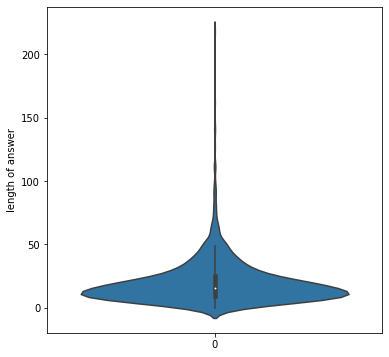

In [135]:
answerLen=[]
for i in range(len(data)):
    answerLen.append(len(data['word_list'].iloc[i]))
fig, ax = plt.subplots(1,1,figsize=(6, 6))
sns.violinplot(data=answerLen)
ax.set_ylabel('length of answer')
#print('Max sentence length in Q&A is '+str(max(np.array(qa_sentence_len))))

In [136]:
max_length = 32
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#padded_docs_Test = pad_sequences(encoded_docs_Test, maxlen=max_length, padding='post')
print(padded_docs[0:5])

[[ 56   5   7  97 108   2   6  29   2 122   2  34   1  31   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16  51  18 102   2  34   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16  51  18 102   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16  97 102   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16  23  11   1  48   5  16 342 218  53  34   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [137]:
labels = to_categorical(np.asarray(labels))

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.25, random_state=14, stratify = labels)
print(type(X_train))
print(type( X_test))
print(type(y_train))
print(type( y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [139]:
print(X_train.shape)
print(X_test.shape)
print(type(X_train))
print(type(y_train))
print(y_train.shape)
print(y_test.shape)

(1086, 32)
(362, 32)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1086, 5)
(362, 5)


In [115]:
def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.set_ylabel('categorical cross entropy')
    ax1.set_xlabel('epoch')
    ax1.set_yscale('log')
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel('epoch')
    ax1.plot(history['loss'], label = "training")
    ax1.plot(history['val_loss'], label = "validation")
    ax2.plot(history['accuracy'], label = "training")
    ax2.plot(history['val_accuracy'], label = "validation")
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)

In [116]:
def plot_different_histories(history_1, history_2, history_3, history_4=None, label_1='', label_2='', label_3='', label_4='',title=''):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 7))
    fig.suptitle(title)
    ax1.set_ylabel('categorical cross entropy')
    ax1.set_xlabel('epoch')
    ax1.set_yscale('log')
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel('epoch')
    if history_4==None:
        ax1.plot(history_1['loss'], label=label_1 + ' training',c='r')
        ax1.plot(history_1['val_loss'], label=label_1 + ' validation',c='r',linestyle='--')
        ax1.plot(history_2['loss'], label=label_2 + ' training',c='g')
        ax1.plot(history_2['val_loss'], label=label_2 + ' validation',c='g',linestyle='--')
        ax1.plot(history_3['loss'], label=label_3 + ' training',c='b')
        ax1.plot(history_3['val_loss'], label=label_3 + ' validation',c='b',linestyle='--')
        ax2.plot(history_1['accuracy'], label=label_1 + ' training',c='r')
        ax2.plot(history_1['val_accuracy'], label=label_1 + ' validation',c='r',linestyle='--')
        ax2.plot(history_2['accuracy'], label=label_2 + ' training',c='g')
        ax2.plot(history_2['val_accuracy'], label=label_2 + ' validation',c='g',linestyle='--')
        ax2.plot(history_3['accuracy'], label=label_3 + ' training',c='b')
        ax2.plot(history_3['val_accuracy'], label=label_3 + ' validation',c='b',linestyle='--')
    else:
        ax1.plot(history_1['loss'], label=label_1 + ' training',c='r')
        ax1.plot(history_1['val_loss'], label=label_1 + ' validation',c='r',linestyle='--')
        ax1.plot(history_2['loss'], label=label_2 + ' training',c='g')
        ax1.plot(history_2['val_loss'], label=label_2 + ' validation',c='g',linestyle='--')
        ax1.plot(history_3['loss'], label=label_3 + ' training',c='b')
        ax1.plot(history_3['val_loss'], label=label_3 + ' validation',c='b',linestyle='--')
        ax1.plot(history_4['loss'], label=label_4 + ' training',c='brown')
        ax1.plot(history_4['val_loss'], label=label_4 + ' validation',c='brown',linestyle='--')
        ax2.plot(history_1['accuracy'], label=label_1 + ' training',c='r')
        ax2.plot(history_1['val_accuracy'], label=label_1 + ' validation',c='r',linestyle='--')
        ax2.plot(history_2['accuracy'], label=label_2 + ' training',c='g')
        ax2.plot(history_2['val_accuracy'], label=label_2 + ' validation',c='g',linestyle='--')
        ax2.plot(history_3['accuracy'], label=label_3 + ' training',c='b')
        ax2.plot(history_3['val_accuracy'], label=label_3 + ' validation',c='b',linestyle='--')
        ax2.plot(history_4['accuracy'], label=label_4 + ' training',c='brown')
        ax2.plot(history_4['val_accuracy'], label=label_4 + ' validation',c='brown',linestyle='--')
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)


## Embedding + MLP

In [80]:
vocab_size

402

In [81]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, verbose=2)

In [82]:
mlp_model = Sequential()
mlp_model.add(Embedding(vocab_size, 64, input_length=max_length))
mlp_model.add(Dropout(0.5))
mlp_model.add(Flatten())
mlp_model.add(Dense(32,activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(5,activation='softmax'))

In [83]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [84]:
mlp_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 32, 64)            25728     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                65568     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 165       
Total params: 91,461
Trainable params: 91,461
Non-trainable params: 0
__________________________________________________

In [85]:
mlp_history=mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500,verbose=1,callbacks=[early_stopping])

D:\anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 434 samples, validate on 1014 samples
Epoch 1/500
434/434 [==============================] - 0s 576us/step - loss: 1.4801 - accuracy: 0.4793 - val_loss: 1.3105 - val_accuracy: 0.6065
Epoch 2/500
434/434 [==============================] - 0s 277us/step - loss: 1.2439 - accuracy: 0.6129 - val_loss: 1.1941 - val_accuracy: 0.6134
Epoch 3/500
434/434 [==============================] - 0s 253us/step - loss: 1.1699 - accuracy: 0.6198 - val_loss: 1.1447 - val_accuracy: 0.6134
Epoch 4/500
434/434 [==============================] - 0s 248us/step - loss: 1.1214 - accuracy: 0.6382 - val_loss: 1.0979 - val_accuracy: 0.6134
Epoch 5/500
434/434 [==============================] - 0s 230us/step - loss: 1.0710 - accuracy: 0.6244 - val_loss: 1.0416 - val_accuracy: 0.6174
Epoch 6/500
434/434 [==============================] - 0s 231us/step - loss: 1.0272 - accuracy: 0.6498 - val_loss: 0.9914 - val_accuracy: 0.6262
Epoch 7/500
434/434 [==============================] - 0s 253us/step - loss: 0.9541

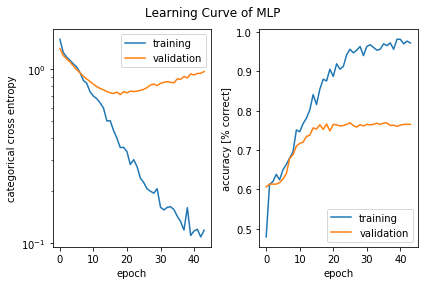

In [86]:
plot_history(mlp_history.history, 'Learning Curve of MLP')

## Embedding + RNN + Dropout

In [140]:
rnn_model = Sequential()
rnn_model.add(Embedding(vocab_size, 64, input_length=max_length))
rnn_model.add(Dropout(0.3))
rnn_model.add(SimpleRNN(16))
rnn_model.add(Dropout(0.3))
rnn_model.add(Dense(5,activation='softmax'))
# compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 32, 64)            25728     
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 64)            0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 16)                1296      
_________________________________________________________________
dropout_22 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 85        
Total params: 27,109
Trainable params: 27,109
Non-trainable params: 0
_________________________________________________________________


In [141]:
rnn_history=rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500,verbose=1, 
                          batch_size=16,callbacks=[early_stopping])

D:\anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1086 samples, validate on 362 samples
Epoch 1/500
1086/1086 [==============================] - 1s 1ms/step - loss: 1.2845 - accuracy: 0.5368 - val_loss: 1.0943 - val_accuracy: 0.6133
Epoch 2/500
1086/1086 [==============================] - 1s 825us/step - loss: 1.0631 - accuracy: 0.6427 - val_loss: 1.0219 - val_accuracy: 0.6298
Epoch 3/500
1086/1086 [==============================] - 1s 822us/step - loss: 0.9402 - accuracy: 0.6667 - val_loss: 0.9191 - val_accuracy: 0.6519
Epoch 4/500
1086/1086 [==============================] - 1s 806us/step - loss: 0.8444 - accuracy: 0.7017 - val_loss: 0.8925 - val_accuracy: 0.6575
Epoch 5/500
1086/1086 [==============================] - 1s 824us/step - loss: 0.7864 - accuracy: 0.7265 - val_loss: 0.8766 - val_accuracy: 0.6713
Epoch 6/500
1086/1086 [==============================] - 1s 854us/step - loss: 0.7392 - accuracy: 0.7477 - val_loss: 0.8784 - val_accuracy: 0.6851
Epoch 7/500
1086/1086 [==============================] - 1s 819us/step - 

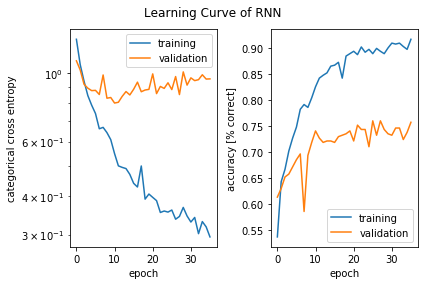

In [142]:
plot_history(rnn_history.history, 'Learning Curve of RNN')

## Embedding + GRU + Dropout

In [117]:
gru_model = Sequential()
gru_model.add(Embedding(vocab_size, 64, input_length=max_length))
gru_model.add(Dropout(0.3))
gru_model.add(GRU(32))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(5,activation='softmax'))
# compile the model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
gru_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 32, 64)            25728     
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 64)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 165       
Total params: 35,205
Trainable params: 35,205
Non-trainable params: 0
_________________________________________________________________


In [118]:
gru_history=gru_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500,verbose=1, 
                          batch_size=16,callbacks=[early_stopping])

D:\anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1230 samples, validate on 218 samples
Epoch 1/500
1230/1230 [==============================] - 2s 2ms/step - loss: 1.2943 - accuracy: 0.5854 - val_loss: 1.1473 - val_accuracy: 0.6147
Epoch 2/500
1230/1230 [==============================] - 2s 2ms/step - loss: 1.1552 - accuracy: 0.6130 - val_loss: 1.1252 - val_accuracy: 0.6147
Epoch 3/500
1230/1230 [==============================] - 2s 2ms/step - loss: 1.1183 - accuracy: 0.6146 - val_loss: 1.1012 - val_accuracy: 0.6239
Epoch 4/500
1230/1230 [==============================] - 2s 2ms/step - loss: 1.0472 - accuracy: 0.6285 - val_loss: 0.9318 - val_accuracy: 0.7156
Epoch 5/500
1230/1230 [==============================] - 2s 2ms/step - loss: 0.8341 - accuracy: 0.7236 - val_loss: 0.8038 - val_accuracy: 0.7202
Epoch 6/500
1230/1230 [==============================] - 2s 2ms/step - loss: 0.6999 - accuracy: 0.7659 - val_loss: 0.7113 - val_accuracy: 0.7615
Epoch 7/500
1230/1230 [==============================] - 2s 2ms/step - loss: 0.5844

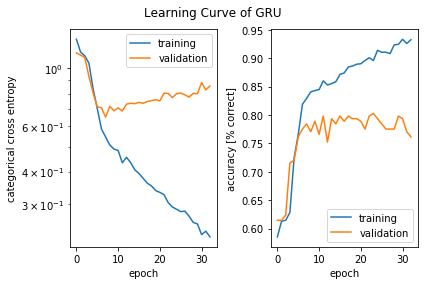

In [119]:
plot_history(gru_history.history, 'Learning Curve of GRU')

## Embedding + LSTM + Dropout

In [120]:
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 64, input_length=max_length))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(5,activation='softmax'))
# compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 32, 64)            25728     
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 165       
Total params: 38,309
Trainable params: 38,309
Non-trainable params: 0
_________________________________________________________________


In [121]:
lstm_history=lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500,verbose=1, 
                            batch_size=16,callbacks=[early_stopping])

D:\anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1230 samples, validate on 218 samples
Epoch 1/500
1230/1230 [==============================] - 2s 2ms/step - loss: 1.2489 - accuracy: 0.6057 - val_loss: 1.1396 - val_accuracy: 0.6147
Epoch 2/500
1230/1230 [==============================] - 2s 1ms/step - loss: 1.1149 - accuracy: 0.6179 - val_loss: 0.9985 - val_accuracy: 0.6147
Epoch 3/500
1230/1230 [==============================] - 2s 1ms/step - loss: 0.8474 - accuracy: 0.7236 - val_loss: 0.7423 - val_accuracy: 0.7661
Epoch 4/500
1230/1230 [==============================] - 2s 1ms/step - loss: 0.7004 - accuracy: 0.7780 - val_loss: 0.6886 - val_accuracy: 0.7706
Epoch 5/500
1230/1230 [==============================] - 2s 1ms/step - loss: 0.6134 - accuracy: 0.8114 - val_loss: 0.6821 - val_accuracy: 0.7844
Epoch 6/500
1230/1230 [==============================] - 2s 1ms/step - loss: 0.5502 - accuracy: 0.8407 - val_loss: 0.6592 - val_accuracy: 0.7890
Epoch 7/500
1230/1230 [==============================] - 2s 1ms/step - loss: 0.5049

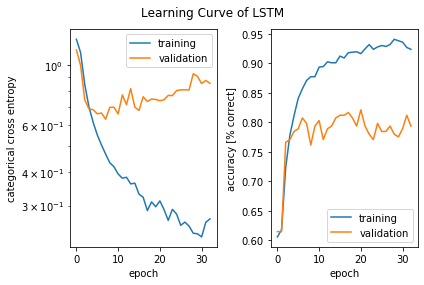

In [122]:
plot_history(lstm_history.history, 'Learning Curve of LSTM')

## Comparison

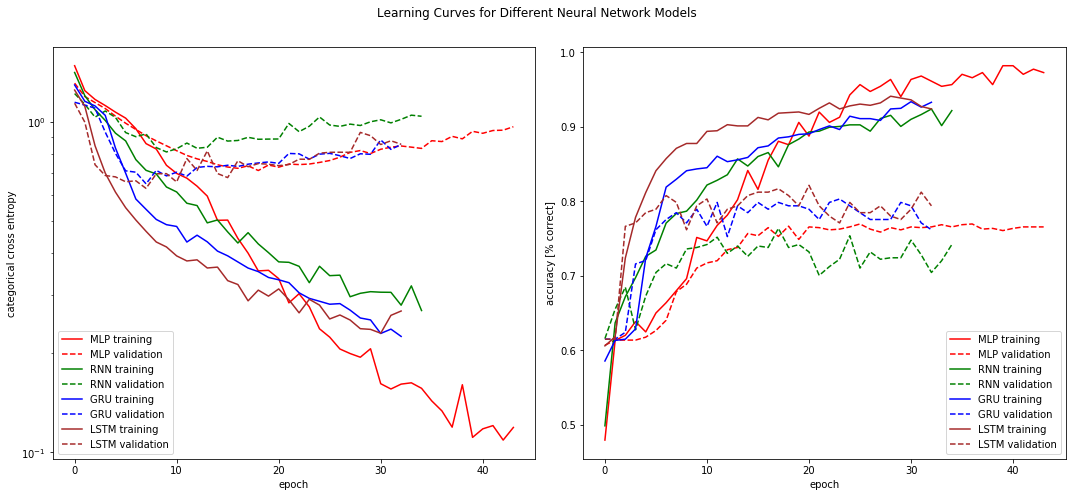

In [123]:
plot_different_histories(mlp_history.history,rnn_history.history,gru_history.history, history_4=lstm_history.history,
                         label_1='MLP',label_2='RNN',label_3='GRU',label_4='LSTM',
                         title='Learning Curves for Different Neural Network Models')

# Embedding + CNN

In [124]:
cnn_model = Sequential()
cnn_model.add(Embedding(vocab_size, 64, input_length=max_length))
cnn_model.add(Conv1D(32,5,activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(MaxPooling1D(3))
cnn_model.add(Conv1D(16,5,activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())        
cnn_model.add(Dense(16,activation='relu'))
cnn_model.add(Dense(5,activation='softmax'))
# compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 32, 64)            25728     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 32)            10272     
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 32)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 16)             2576      
_________________________________________________________________
dropout_20 (Dropout)         (None, 5, 16)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 80)              

In [125]:
cnn_history=cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500,verbose=1, 
                            batch_size=16,callbacks=[early_stopping])

D:\anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1230 samples, validate on 218 samples
Epoch 1/500
1230/1230 [==============================] - 3s 3ms/step - loss: 1.2209 - accuracy: 0.5764 - val_loss: 1.0458 - val_accuracy: 0.6147
Epoch 2/500
1230/1230 [==============================] - 0s 285us/step - loss: 0.9591 - accuracy: 0.6179 - val_loss: 0.8905 - val_accuracy: 0.6560
Epoch 3/500
1230/1230 [==============================] - 0s 277us/step - loss: 0.7716 - accuracy: 0.7244 - val_loss: 0.7026 - val_accuracy: 0.7706
Epoch 4/500
1230/1230 [==============================] - 0s 276us/step - loss: 0.6355 - accuracy: 0.7967 - val_loss: 0.6218 - val_accuracy: 0.7706
Epoch 5/500
1230/1230 [==============================] - 0s 279us/step - loss: 0.5357 - accuracy: 0.8244 - val_loss: 0.5959 - val_accuracy: 0.8165
Epoch 6/500
1230/1230 [==============================] - 0s 274us/step - loss: 0.4674 - accuracy: 0.8650 - val_loss: 0.5867 - val_accuracy: 0.8073
Epoch 7/500
1230/1230 [==============================] - 0s 277us/step - 

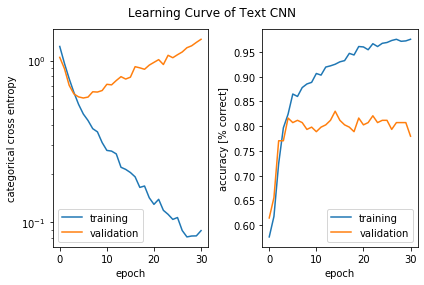

In [126]:
plot_history(cnn_history.history, 'Learning Curve of Text CNN')

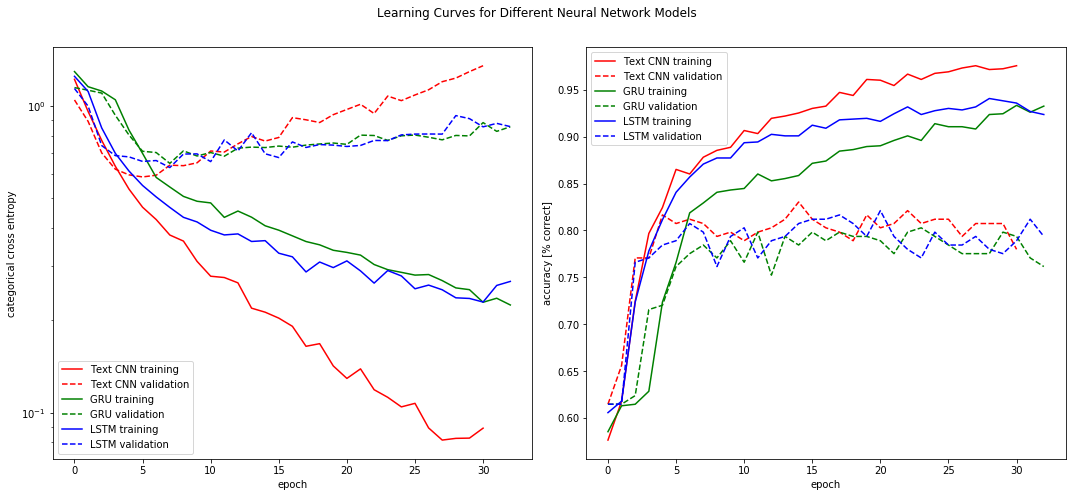

In [127]:
plot_different_histories(cnn_history.history,gru_history.history,lstm_history.history,
                         label_1='Text CNN',label_2='GRU',label_3='LSTM',
                         title='Learning Curves for Different Neural Network Models')

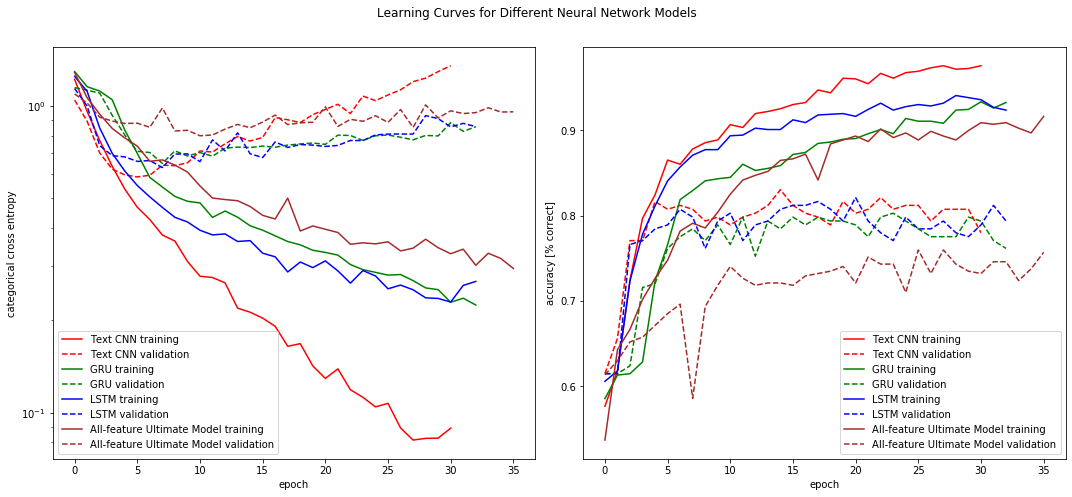

In [143]:
plot_different_histories(cnn_history.history,gru_history.history,lstm_history.history,rnn_history.history,
                         label_1='Text CNN',label_2='GRU',label_3='LSTM',label_4='All-feature Ultimate Model',
                         title='Learning Curves for Different Neural Network Models')

# Embedding Features--BoW

In [144]:
from sklearn.manifold import TSNE
import pickle

In [145]:
best_embedding=lstm_model.layers[0]
temp_model = Sequential()
temp_model.add(best_embedding)

In [146]:
def get_embedding_weight(word):
    temp_sentence=[word]
    temp_sentence=t.texts_to_sequences(temp_sentence)
    temp_padded_docs = pad_sequences(temp_sentence, maxlen=max_length, padding='post')
    temp_pred=temp_model.predict(temp_padded_docs)
    word_weight=temp_pred[0][0]
    return word_weight

In [147]:
get_embedding_weight('no')

array([-0.03127889, -0.0098641 , -0.02512477, -0.0284997 , -0.14235014,
       -0.0174642 ,  0.04402793,  0.0505213 ,  0.02443573, -0.06280934,
        0.06463758, -0.03442865, -0.00030018, -0.02521348,  0.04918984,
       -0.0234021 , -0.08170603,  0.0282986 , -0.05144439,  0.07814205,
        0.04120192,  0.01299073, -0.04663216,  0.02022781,  0.04859442,
        0.01306642,  0.05741876, -0.07831404,  0.01117691,  0.0055666 ,
        0.08632681, -0.05740893, -0.00684129,  0.01612698,  0.03804221,
       -0.01977132,  0.0903487 , -0.04866323,  0.01823485, -0.01267519,
       -0.03603897, -0.07603046, -0.02374632,  0.03830094,  0.04959632,
       -0.01073377, -0.04316774,  0.03201539, -0.0679175 ,  0.01763784,
        0.02568216,  0.02520042,  0.04596679,  0.02644099, -0.03216236,
       -0.04938971,  0.01028075, -0.01928801, -0.02192776,  0.06670386,
       -0.06752674, -0.06968261,  0.05298205,  0.0041628 ], dtype=float32)

In [148]:
temp_all_words=[]
for i in range(len(data)):
    temp_words=data.word_list.iloc[i]
    for temp_word in temp_words:
        if not(temp_word in temp_all_words):
            temp_all_words.append(temp_word)

In [149]:
all_words=[]
all_words_weights=[]
for temp_word in temp_all_words:
    try:
        temp_weight=get_embedding_weight(temp_word)
        all_words_weights.append(temp_weight)
        all_words.append(temp_word)
    except:
        continue

In [150]:
tsne=TSNE()
tsne.fit_transform(all_words_weights)
tsne_list=tsne.embedding_

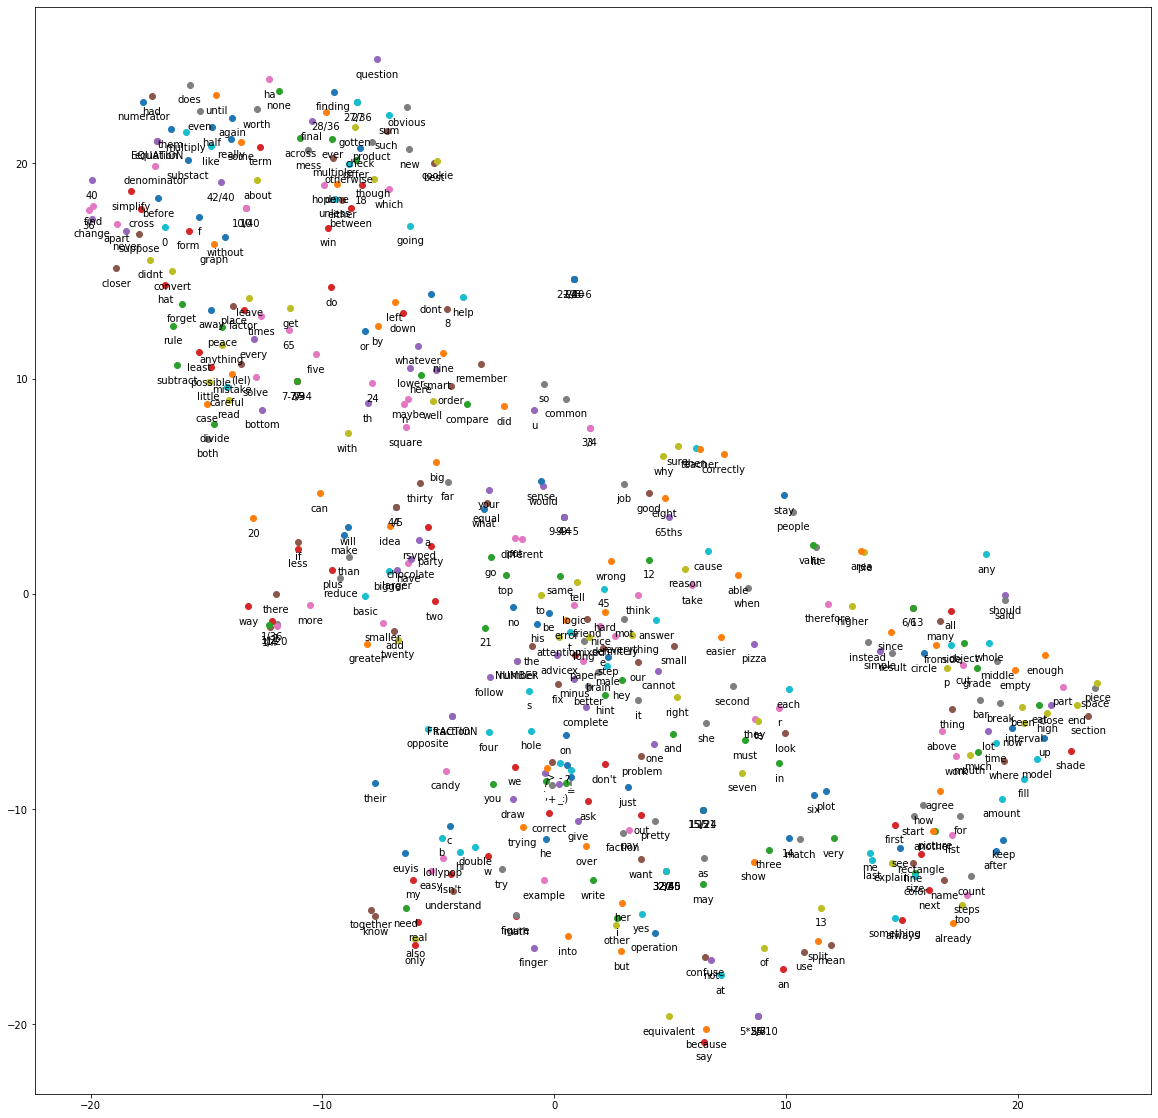

In [151]:
fig, ax = plt.subplots(1,1,figsize=(20, 20))
for i in range(len(all_words)):
    temp_word= all_words[i]
    temp_x=tsne_list[i][0]
    temp_y=tsne_list[i][1]
    ax.scatter(temp_x,temp_y)
    ax.annotate(
        temp_word,
        xy=(temp_x, temp_y),
        xytext=(0, -10),
        textcoords='offset points',
        ha='center',
        va='top')

# Embedding Features-- answer sequence

### most frequent sequences

In [319]:
best_embedding=lstm_model.layers[0]
best_lstm_layer=lstm_model.layers[2]
temp_model = Sequential()
temp_model.add(best_embedding)
temp_model.add(best_lstm_layer)

In [320]:
def get_embedding_lstm_weight(sequence):
    temp_sentence=sequence
    temp_sentence=t.texts_to_sequences(temp_sentence)
    temp_padded_docs = pad_sequences(temp_sentence, maxlen=max_length, padding='post')
    temp_pred=temp_model.predict(temp_padded_docs)
    word_weight=temp_pred[0]
    return word_weight

In [321]:
get_embedding_lstm_weight(['i', "don't",'know'])

array([-0.5502955 ,  0.37509057,  0.08918363, -0.79036754, -0.4476778 ,
        0.61958367,  0.2260162 ,  0.74599296,  0.2433242 ,  0.02445346,
       -0.00413143,  0.4478511 , -0.28137875, -0.33836123, -0.48633757,
       -0.5523361 ,  0.09473494,  0.53263015, -0.03421238,  0.54391664,
        0.39485332,  0.04162109, -0.2700365 ,  0.6032635 ,  0.3583636 ,
        0.22771251,  0.22984178, -0.50946   , -0.7038882 ,  0.04203872,
       -0.03199419, -0.70587903], dtype=float32)

In [322]:
import nltk
from nltk.util import ngrams

In [323]:
sequence_count_dict={}
for i in range(len(data)):
    temp_word_list=data.word_list.iloc[i]
    for temp_sequence in ngrams(temp_word_list,3):
        try:
            sequence_count_dict[temp_sequence]=sequence_count_dict[temp_sequence]+1
        except:
            sequence_count_dict[temp_sequence]=1
    '''
    for temp_sequence in ngrams(temp_word_list,4):
        try:
            sequence_count_dict[temp_sequence]=sequence_count_dict[temp_sequence]+1
        except:
            sequence_count_dict[temp_sequence]=1
    for temp_sequence in ngrams(temp_word_list,5):
        try:
            sequence_count_dict[temp_sequence]=sequence_count_dict[temp_sequence]+1
        except:
            sequence_count_dict[temp_sequence]=1
    '''

In [502]:
most_freq_100_sequence=sorted(sequence_count_dict.items(), key=lambda item: item[1], reverse=True)[:90]

In [503]:
most_freq_sequences=[temp[0] for temp in most_freq_100_sequence]

In [504]:
chosen_sequences=[]
for temp_sequence in most_freq_sequences:
    temp_sequence_list=[]
    for i in range(len(temp_sequence)):
        temp_sequence_list.append(temp_sequence[i])
    chosen_sequences.append(temp_sequence_list)

In [505]:
chosen_sequences_weights=[]
for temp_sequence in chosen_sequences:
    try:
        temp_weight=get_embedding_lstm_weight(temp_sequence)
        chosen_sequences_weights.append(temp_weight)
    except:
        continue

In [512]:
tsne=TSNE()
tsne.fit_transform(chosen_sequences_weights)
tsne_list=tsne.embedding_

In [513]:
chosen_sequences_str=[]
for temp_word_list in chosen_sequences:
    temp_str=''
    for temp_word in temp_word_list:
        temp_str=temp_str+temp_word+' '
    chosen_sequences_str.append(temp_str[:-1])

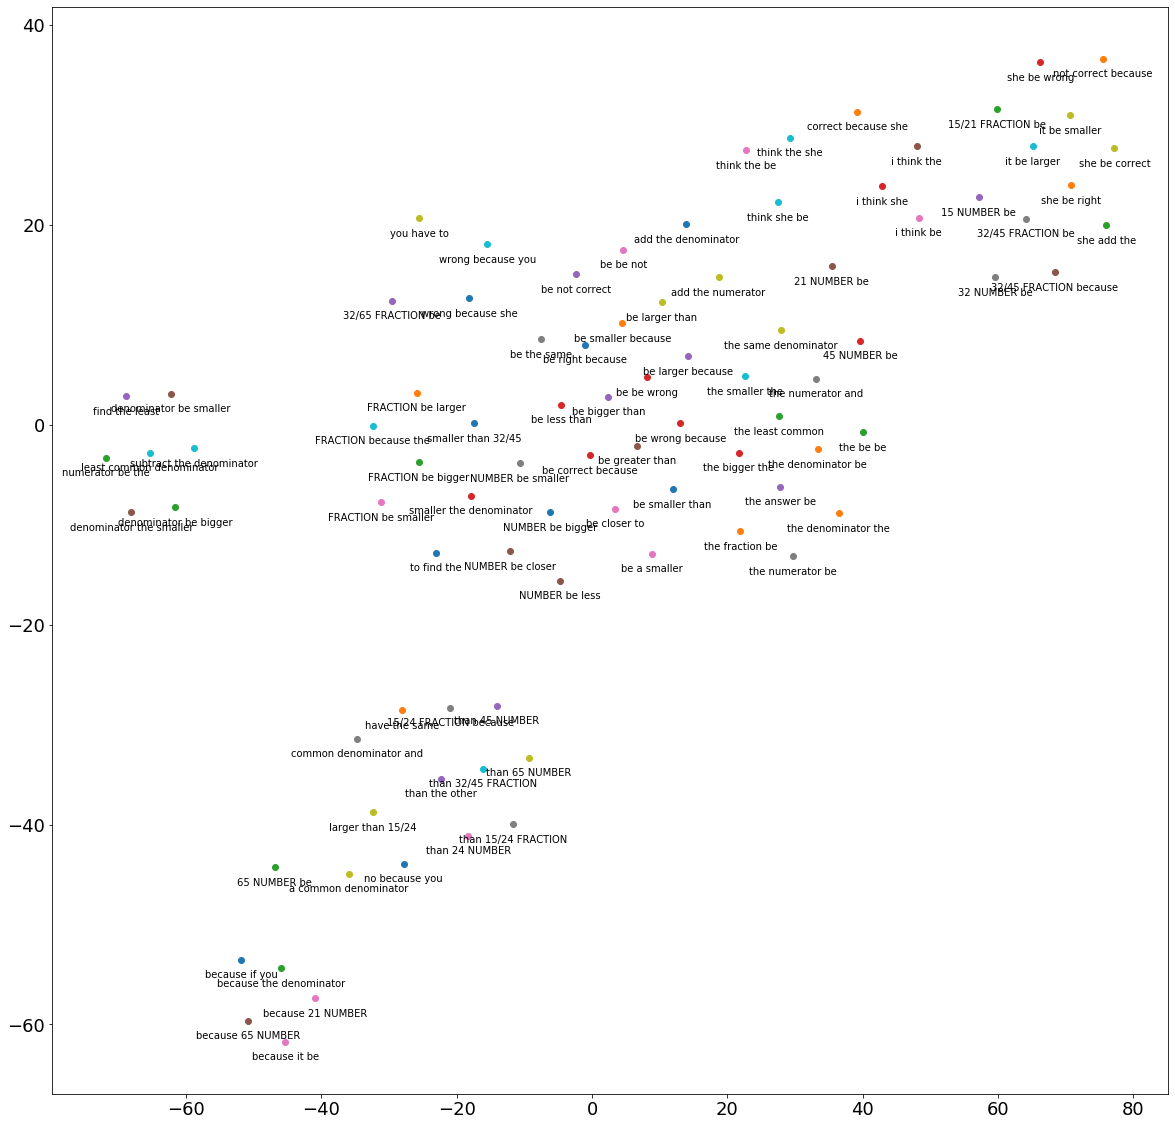

In [514]:
fig, ax = plt.subplots(1,1,figsize=(20, 20))
for i in range(len(chosen_sequences)):
    temp_sequence= chosen_sequences_str[i]
    temp_x=tsne_list[i][0]
    temp_y=tsne_list[i][1]
    ax.scatter(temp_x,temp_y)
    ax.tick_params(labelsize=18)
    ax.annotate(
        temp_sequence,
        xy=(temp_x, temp_y),
        xytext=(0, -10),
        textcoords='offset points',
        ha='center',
        va='top')

###  most informative sequences

In [515]:
select_gram_list=np.load('select_gram_list.npy')

In [584]:
select_3_gram_list=[]
for temp_word_list in select_gram_list:
    if len(temp_word_list.split(' '))==3 and ( not ( temp_word_list in select_3_gram_list)):
        select_3_gram_list.append(temp_word_list)
        

In [586]:
chosen_sequences_weights=[]
for temp_sequence in select_3_gram_list:
    try:
        temp_weight=get_embedding_lstm_weight(temp_sequence)
        chosen_sequences_weights.append(temp_weight)
    except:
        continue

In [593]:
tsne=TSNE()
tsne.fit_transform(chosen_sequences_weights)
tsne_list=tsne.embedding_

In [594]:
chosen_sequences_str=[]
for temp_word_list in chosen_sequences:
    temp_str=''
    for temp_word in temp_word_list:
        temp_str=temp_str+temp_word+' '
    chosen_sequences_str.append(temp_str[:-1])

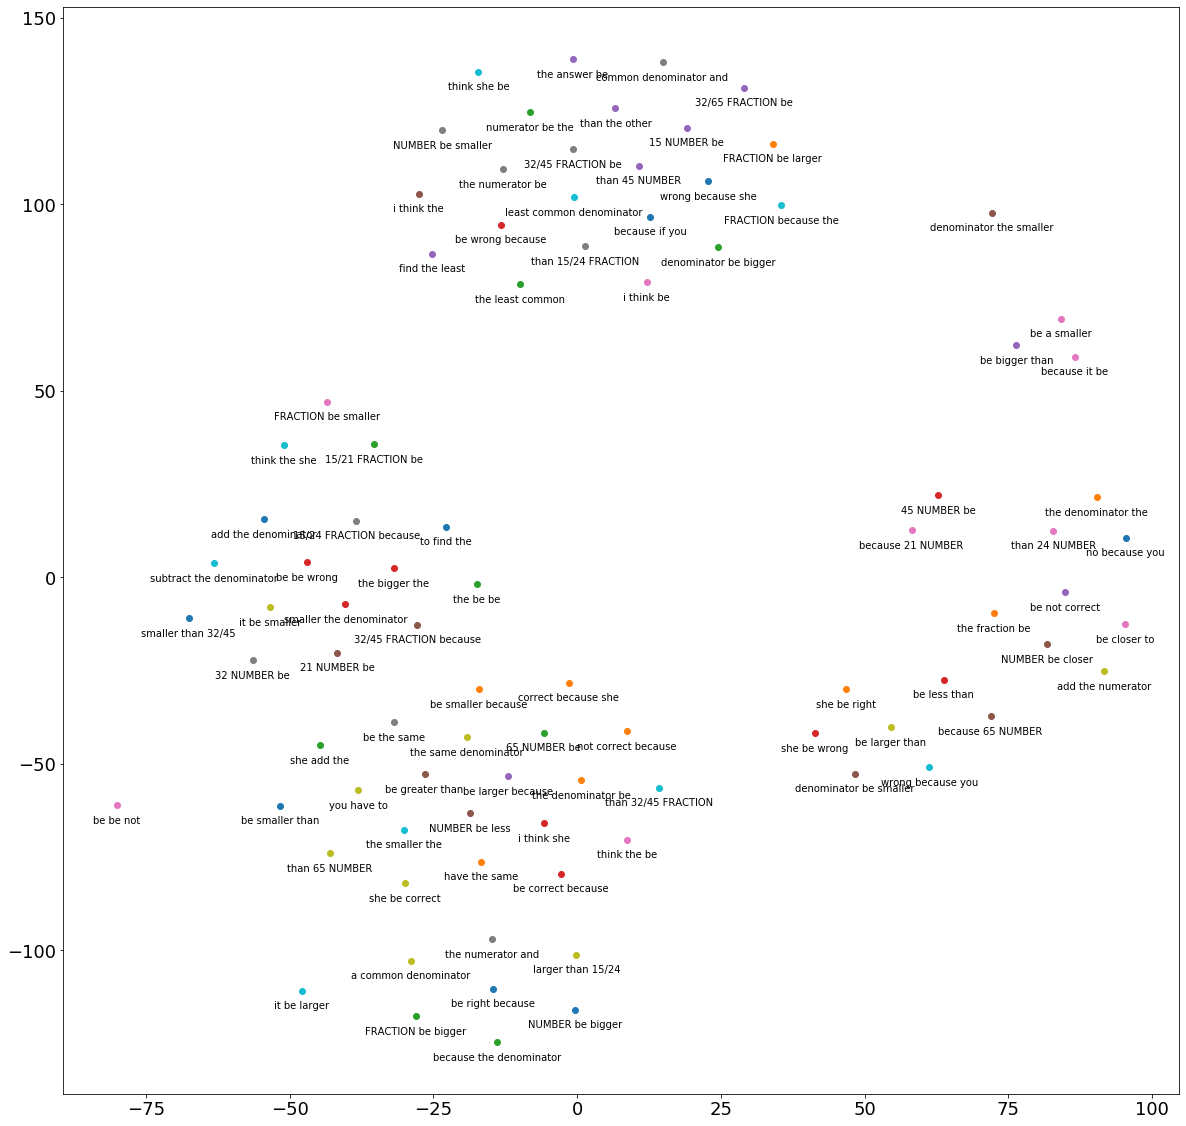

In [583]:
fig, ax = plt.subplots(1,1,figsize=(20, 20))
for i in range(len(chosen_sequences)):
    temp_sequence= chosen_sequences_str[i]
    temp_x=tsne_list[i][0]
    temp_y=tsne_list[i][1]
    ax.scatter(temp_x,temp_y)
    ax.tick_params(labelsize=18)
    ax.annotate(
        temp_sequence,
        xy=(temp_x, temp_y),
        xytext=(0, -10),
        textcoords='offset points',
        ha='center',
        va='top')